# Load Libraries

In [1]:
!pip install -U jax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33


In [2]:
!pip install diffrax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import os

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Read mat files
import scipy.io

# For diffrax
import math
import time

import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import jax.scipy as jsp
import optax  # https://github.com/deepmind/optax


matplotlib.rcParams.update({"font.size": 30})
# Other
import math

# Load Data

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
data_path = "/content/drive/MyDrive/Grad_Stuff/Masters/Research Thesis/data/"
bacteria_path = os.path.join(data_path, "bacteria/")

In [76]:
autophos = pd.read_csv(os.path.join(bacteria_path, "autophos_DL_EL_2017.csv"))
dephos = pd.read_csv(os.path.join(bacteria_path, "dephospho_rust_2007.csv"))

In [8]:
hare_path = "/content/drive/MyDrive/Grad_Stuff/Masters/Research Thesis/data/lotka_volterra_lynx/"

hare = pd.read_csv(os.path.join(hare_path, "hudson-bay-lynx-hare.csv"))

## Peek

In [ ]:
dephos.Time.unique()

array([ 0.     ,  1.     ,  2.83333,  3.83333,  4.83333,  5.83   ,
        6.83   ,  7.83   ,  8.83   ,  9.83   , 10.83   , 11.83   ,
       12.83   , 13.83   , 14.83   , 15.83   , 17.83   , 18.83   ,
       20.83   , 22.83   , 23.83   ])

In [41]:
autophos

,ind,D,T,S,U,rxn,clean_time,real_time,KaiA,ATP,Temp,KaiC
0,r1_0,0.069135,0.045399,1.678868,98.206598,r1,0,0.000000,0.375,100,30,3.50
1,r1_1,0.697227,4.525235,4.782960,89.994578,r1,1,1.000000,0.375,100,30,3.50
2,r1_2,1.196453,6.720664,5.305223,86.777660,r1,2,2.000000,0.375,100,30,3.50
3,r1_3,2.052489,8.442819,6.426792,83.077900,r1,3,3.500000,0.375,100,30,3.50
4,r1_4,1.558885,8.585833,6.082250,83.773031,r1,4,4.500000,0.375,100,30,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
155,half1_3,17.001069,45.908086,8.947023,28.143822,half1,3,3.500000,1.500,100,30,1.75
156,half1_4,22.325297,45.361119,11.082416,21.231169,half1,4,4.500000,1.500,100,30,1.75
157,half1_6,30.574159,44.913467,9.700987,14.811387,half1,6,6.966667,1.500,100,30,1.75
158,half1_10,35.470827,34.873061,15.845843,13.810269,half1,10,10.216667,1.500,100,30,1.75


In [ ]:
dephos

,Unnamed: 0,Time,D,T,S,U,KaiC,ATP
0,0,0.00000,32.07453,23.22583,16.23466,28.46498,3.4,100
1,1,1.00000,25.80237,16.70902,21.49400,35.99461,3.4,100
2,2,2.83333,13.00753,9.26314,30.61895,47.11038,3.4,100
3,3,3.83333,9.46043,7.18825,32.13949,51.21184,3.4,100
4,4,4.83333,7.84428,6.07957,31.78975,54.28640,3.4,100
5,5,5.83000,5.02651,4.42007,30.17948,60.37395,3.4,100
6,6,6.83000,4.06086,2.83945,29.52165,63.57804,3.4,100
7,7,7.83000,3.54522,4.19358,25.56270,66.69850,3.4,100
8,8,8.83000,2.93466,3.25736,24.27179,69.53619,3.4,100
9,9,9.83000,2.65099,2.18048,22.66057,72.50796,3.4,100


# Exploratory Analyses

## Summary Statistics

In [ ]:
autophos.describe()

,D,T,S,U,clean_time,real_time,KaiA,ATP,Temp,KaiC
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000
mean,15.036224,22.436594,10.229872,52.297309,4.750000,5.054167,2.568750,50.500000,30.0,3.587500
std,14.342999,14.871033,6.517234,30.131158,4.036002,4.137882,1.970089,40.960174,0.0,0.873347
min,0.061390,0.045399,0.141678,2.853153,0.000000,0.000000,0.375000,10.000000,30.0,1.750000
25%,1.989002,6.387289,5.247377,26.255204,1.750000,1.750000,0.750000,10.000000,30.0,3.500000
50%,10.908354,24.323275,9.312941,47.422584,3.500000,4.000000,1.500000,25.000000,30.0,3.500000
75%,23.902605,34.862186,14.286194,85.305731,7.000000,7.779167,4.500000,100.000000,30.0,3.500000
max,55.795508,51.942177,30.321727,98.633730,12.000000,12.250000,6.000000,100.000000,30.0,7.000000


In [ ]:
dephos.describe()

,Unnamed: 0,Time,D,T,S,U,KaiC,ATP
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.0
mean,10.000000,11.227619,6.109262,4.916422,18.780892,70.193425,3.400000e+00,100.0
std,6.204837,7.054991,8.207520,5.475639,8.724664,17.990249,4.550560e-16,0.0
min,0.000000,0.000000,1.277560,1.665750,6.769900,28.464980,3.400000e+00,100.0
25%,5.000000,5.830000,1.909230,2.129080,11.787800,60.373950,3.400000e+00,100.0
50%,10.000000,10.830000,2.650990,2.678130,16.421820,77.736160,3.400000e+00,100.0
75%,15.000000,15.830000,5.026510,4.420070,25.562700,83.782320,3.400000e+00,100.0
max,20.000000,23.830000,32.074530,23.225830,32.139490,90.061480,3.400000e+00,100.0


## `autophos` Distributions

In [ ]:
autophos['real_time'].unique()

array([ 0.        ,  1.        ,  2.        ,  3.5       ,  4.5       ,
        6.96666667, 10.21666667, 12.25      ])

In [ ]:
autophos['clean_time'].unique()

array([ 0,  1,  2,  3,  4,  6, 10, 12])

<Axes: xlabel='D', ylabel='Count'>

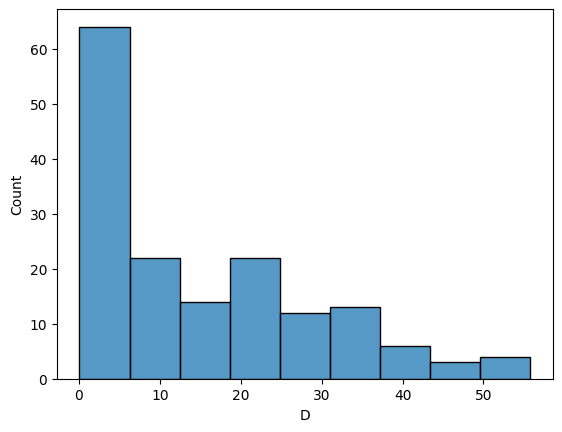

In [ ]:
sns.histplot(autophos['D'])

<Axes: xlabel='S', ylabel='Count'>

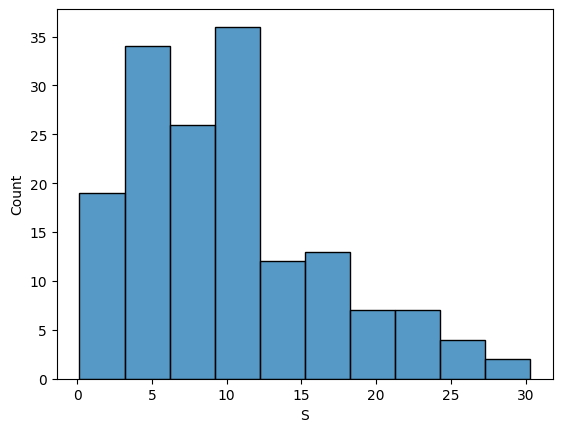

In [ ]:
sns.histplot(autophos['S'])

<Axes: xlabel='T', ylabel='Count'>

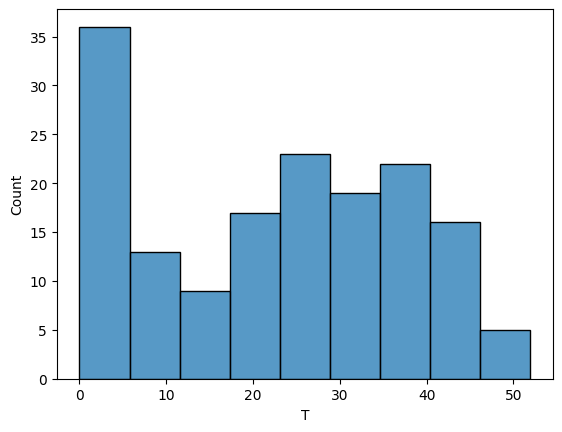

In [ ]:
sns.histplot(autophos['T'])

<Axes: xlabel='KaiA', ylabel='Count'>

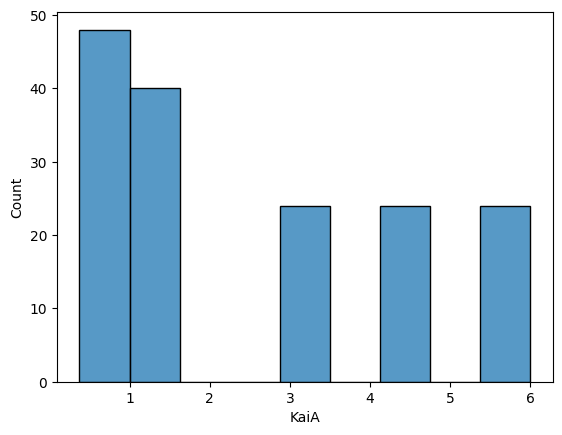

In [ ]:
sns.histplot(autophos['KaiA'])

<Axes: xlabel='KaiC', ylabel='Count'>

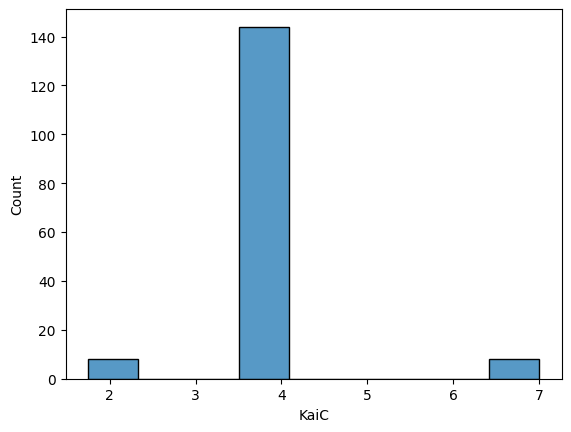

In [ ]:
sns.histplot(autophos['KaiC'])

<Axes: xlabel='ATP', ylabel='Count'>

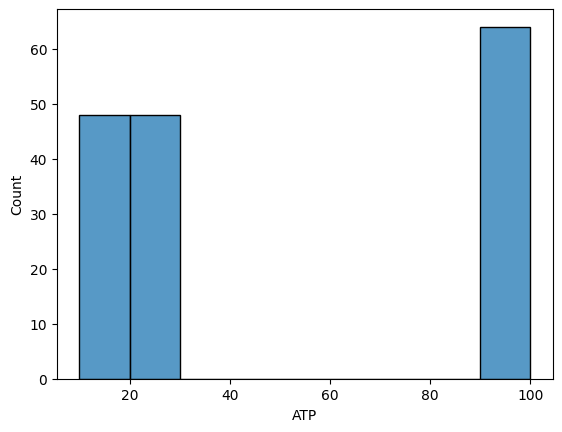

In [ ]:
sns.histplot(autophos['ATP'])

In [ ]:
autophos['Temp'].unique()

array([30])

## `dephos` Distributions

In [ ]:
dephos.head(5)

,Unnamed: 0,Time,D,T,S,U,KaiC,ATP
0,0,0.00000,32.07453,23.22583,16.23466,28.46498,3.4,100
1,1,1.00000,25.80237,16.70902,21.49400,35.99461,3.4,100
2,2,2.83333,13.00753,9.26314,30.61895,47.11038,3.4,100
3,3,3.83333,9.46043,7.18825,32.13949,51.21184,3.4,100
4,4,4.83333,7.84428,6.07957,31.78975,54.28640,3.4,100


In [ ]:
dephos['Time'].unique()

array([ 0.     ,  1.     ,  2.83333,  3.83333,  4.83333,  5.83   ,
        6.83   ,  7.83   ,  8.83   ,  9.83   , 10.83   , 11.83   ,
       12.83   , 13.83   , 14.83   , 15.83   , 17.83   , 18.83   ,
       20.83   , 22.83   , 23.83   ])

<Axes: xlabel='D', ylabel='Count'>

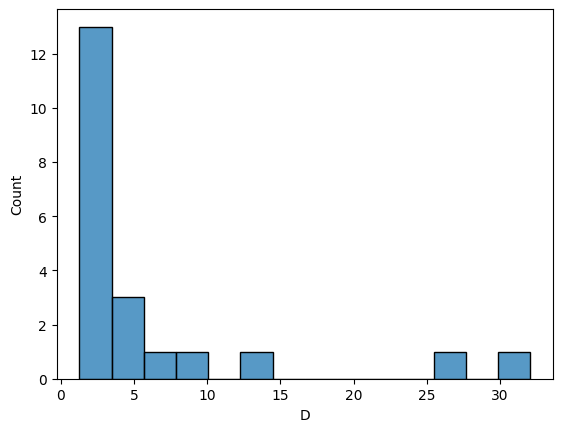

In [ ]:
sns.histplot(dephos['D'])

<Axes: xlabel='S', ylabel='Count'>

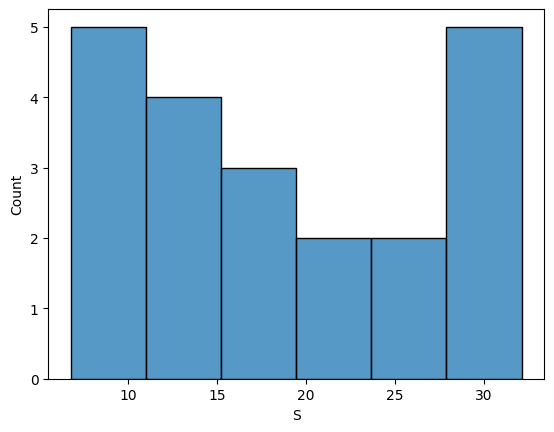

In [ ]:
sns.histplot(dephos['S'])

<Axes: xlabel='T', ylabel='Count'>

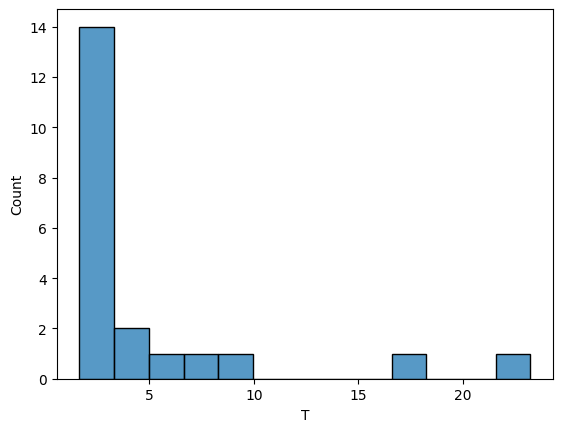

In [ ]:
sns.histplot(dephos['T'])

<Axes: xlabel='U', ylabel='Count'>

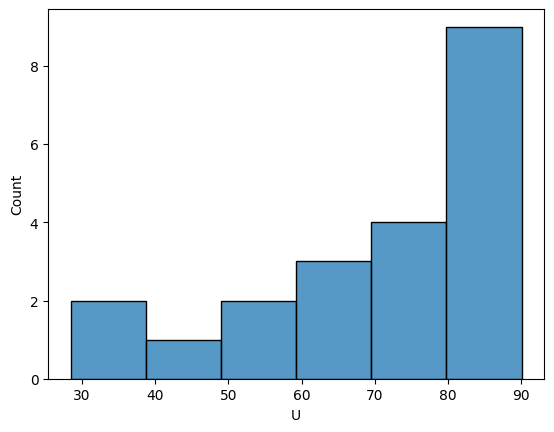

In [ ]:
sns.histplot(dephos['U'])

In [ ]:
dephos['KaiC'].unique()

array([3.4])

In [ ]:
dephos['ATP'].unique()

array([100])

# Set up NN

**Define the vector field for the CDE**

In [10]:
# First, define the function which will specify the vector field of
# the differential equation.
class Func(eqx.Module):
    mlp: eqx.nn.MLP
    data_size: int
    hidden_size: int

    def __init__(self, data_size, hidden_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.data_size = data_size
        self.hidden_size = hidden_size
        self.mlp = eqx.nn.MLP(
            in_size=hidden_size,
            out_size=hidden_size * data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            # Note the use of a tanh final activation function. This is important to
            # stop the model blowing up. (Just like how GRUs and LSTMs constrain the
            # rate of change of their hidden states.)
            final_activation=jnn.tanh,
            key=key,
        )

    def __call__(self, t, y, args):
        return self.mlp(y).reshape(self.hidden_size, self.data_size)

**Now wrap up the whole CDE solve into a model.**

**In this case we cap the neural CDE with a linear layer and sigmoid, to perform binary classification.**

In [34]:
# The above Func will be solved as part of the NeuralCDE algo
# Below. Note we do have an MLP for the initial condition
# As well as the future iterations.
# TODO: Modify this to output 3 values
class NeuralCDE(eqx.Module):
    initial: eqx.nn.MLP
    func: Func
    linear: eqx.nn.Linear

    def __init__(self, data_size, hidden_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        ikey, fkey, lkey = jr.split(key, 3)
        self.initial = eqx.nn.MLP(data_size, hidden_size, width_size, depth, key=ikey)
        self.func = Func(data_size, hidden_size, width_size, depth, key=fkey)
        self.linear = eqx.nn.Linear(hidden_size, 1, key=lkey)

    def __call__(self, ts, coeffs, evolving_out=False):
        # Each sample of data consists of some timestamps `ts`, and some `coeffs`
        # parameterising a control path. These are used to produce a continuous-time
        # input path `control`.
        control = diffrax.CubicInterpolation(ts, coeffs)
        term = diffrax.ControlTerm(self.func, control).to_ode()
        solver = diffrax.Tsit5()
        dt0 = None
        y0 = self.initial(control.evaluate(ts[0]))
        if evolving_out:
            saveat = diffrax.SaveAt(ts=ts)
        else:
            saveat = diffrax.SaveAt(t1=True)
        solution = diffrax.diffeqsolve(
            term,
            solver,
            ts[0],
            ts[-1],
            dt0,
            y0,
            stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
            saveat=saveat,
        )
        if evolving_out:
            prediction = jax.vmap(lambda y: jnn.sigmoid(self.linear(y))[0])(solution.ys)
        else:
            (prediction,) = jnn.sigmoid(self.linear(solution.ys[-1]))
        return prediction

# Load Data

## Load Data for Spiral Sample Dataset

Below is an example data provided in Kidger's Github that we followed closely, but isn't used in the KaiC use case of course.

In [24]:
def get_data(dataset_size, add_noise, *, key):
    theta_key, noise_key = jr.split(key, 2)
    length = 100
    theta = jr.uniform(theta_key, (dataset_size,), minval=0, maxval=2 * math.pi)
    y0 = jnp.stack([jnp.cos(theta), jnp.sin(theta)], axis=-1)
    ts = jnp.broadcast_to(jnp.linspace(0, 4 * math.pi, length), (dataset_size, length))
    matrix = jnp.array([[-0.3, 2], [-2, -0.3]])
    ys = jax.vmap(
        lambda y0i, ti: jax.vmap(lambda tij: jsp.linalg.expm(tij * matrix) @ y0i)(ti)
    )(y0, ts)
    ys = jnp.concatenate([ts[:, :, None], ys], axis=-1)  # time is a channel
    ys = ys.at[: dataset_size // 2, :, 1].multiply(-1)
    if add_noise:
        ys = ys + jr.normal(noise_key, ys.shape) * 0.1
    coeffs = jax.vmap(diffrax.backward_hermite_coefficients)(ts, ys)
    labels = jnp.zeros((dataset_size,))
    labels = labels.at[: dataset_size // 2].set(1.0)
    _, _, data_size = ys.shape
    return ts, coeffs, labels, data_size

def dataloader(arrays, batch_size, *, key):
    dataset_size = arrays[0].shape[0]
    assert all(array.shape[0] == dataset_size for array in arrays)
    indices = jnp.arange(dataset_size)
    while True:
        perm = jr.permutation(key, indices)
        (key,) = jr.split(key, 1)
        start = 0
        end = batch_size
        while end < dataset_size:
            batch_perm = perm[start:end]
            yield tuple(array[batch_perm] for array in arrays)
            start = end
            end = start + batch_size

In [25]:
dataset_size = 256
add_noise = False
key = jr.PRNGKey(0)
ts, coeffs, labels, data_size = get_data(dataset_size, add_noise, key=key)

In [57]:
data_size

3

### Breaking down spiral data loading steps

In [11]:
dataset_size = 256
add_noise = False
key = jr.PRNGKey(0)

# Variable created within suite of function
length = 100

In [14]:
theta_key, noise_key = jr.split(key, 2)


In [15]:
theta_key

Array([4146024105,  967050713], dtype=uint32)

In [16]:
noise_key

Array([2718843009, 1272950319], dtype=uint32)

In [17]:
# this samples uniformly from 0 to 2pi which is the radian length of
# a circle
theta = jr.uniform(key = theta_key,
                   shape = (dataset_size,),
                   minval = 0,
                   maxval = 2 * math.pi)


In [18]:
theta[:10]

Array([1.4666722, 1.1185611, 2.5064192, 5.2542744, 5.3508325, 6.022798 ,
       2.8246512, 4.38545  , 1.7557819, 4.486502 ], dtype=float32)

In [19]:
theta.shape

(256,)

In [20]:
# uniformly sampled points in [0, 2pi] is then projected
# in cosine and sine directions, both in tandem
# draw out a circle.
y0 = jnp.stack([jnp.cos(theta), jnp.sin(theta)], axis = -1)

In [21]:
y0[:10]

Array([[ 0.1039361 ,  0.99458396],
       [ 0.43697712,  0.89947265],
       [-0.8049688 ,  0.59331715],
       [ 0.5157522 , -0.8567378 ],
       [ 0.59594625, -0.80302435],
       [ 0.96629035, -0.25745475],
       [-0.9501931 ,  0.31166178],
       [-0.32114577, -0.94702977],
       [-0.18393235,  0.9829389 ],
       [-0.22397073, -0.97459584]], dtype=float32)

In [22]:
y0.shape

(256, 2)

In [23]:
?jnp.broadcast_to

In [24]:
jnp.linspace(0, 4 * math.pi, length).shape

(100,)

In [25]:
# Broadcasts length = 100 timepoints and dataset_size obs by equidistantly sampling
# From 0 to 4pi
ts = jnp.broadcast_to(array = jnp.linspace(0, 4 * math.pi, length),
                      shape = (dataset_size, length)
                      )


In [47]:
ts.shape

(256, 100)

In [50]:
ts[ :3]

Array([[ 0.        ,  0.12693304,  0.25386608,  0.3807991 ,  0.50773215,
         0.6346652 ,  0.7615982 ,  0.88853127,  1.0154643 ,  1.1423974 ,
         1.2693304 ,  1.3962634 ,  1.5231965 ,  1.6501296 ,  1.7770625 ,
         1.9039955 ,  2.0309286 ,  2.1578617 ,  2.2847948 ,  2.4117277 ,
         2.5386608 ,  2.6655939 ,  2.7925267 ,  2.9194598 ,  3.046393  ,
         3.173326  ,  3.300259  ,  3.427192  ,  3.554125  ,  3.6810582 ,
         3.807991  ,  3.9349241 ,  4.061857  ,  4.1887903 ,  4.3157234 ,
         4.4426565 ,  4.5695896 ,  4.696522  ,  4.8234553 ,  4.9503884 ,
         5.0773215 ,  5.2042546 ,  5.3311877 ,  5.458121  ,  5.5850534 ,
         5.7119865 ,  5.8389196 ,  5.9658527 ,  6.092786  ,  6.219719  ,
         6.346652  ,  6.473585  ,  6.600518  ,  6.727451  ,  6.854384  ,
         6.981317  ,  7.10825   ,  7.2351832 ,  7.3621163 ,  7.4890494 ,
         7.615982  ,  7.742915  ,  7.8698483 ,  7.9967813 ,  8.123714  ,
         8.250648  ,  8.377581  ,  8.504514  ,  8.6

In [29]:
matrix = jnp.array([[-0.3, 2], [-2, -0.3]])
matrix

Array([[-0.3,  2. ],
       [-2. , -0.3]], dtype=float32)

In [41]:
ys = jax.vmap(
    lambda y0i, ti: jax.vmap(lambda tij: jsp.linalg.expm(tij * matrix) @ y0i)(ti)
)(y0, ts)

In [30]:
ts[0][1] * matrix

Array([[-0.03807991,  0.25386608],
       [-0.25386608, -0.03807991]], dtype=float32)

In [35]:
?jax.vmap

In [32]:
jsp.linalg.expm(ts[0][1] * matrix)

Array([[ 0.9317823 ,  0.2417641 ],
       [-0.2417641 ,  0.93178225]], dtype=float32)

In [38]:
y0[0]

Array([0.1039361 , 0.99458396], dtype=float32)

In [39]:
0.9317823 * 0.1039361 + 0.2417641 * 0.99458396

0.337300514274866

In [36]:
jsp.linalg.expm(ts[0][1] * matrix) @ y0[0]

Array([0.3373005, 0.9016077], dtype=float32)

In [55]:
ys.shape

(256, 100, 2)

In [42]:
ys_ = jnp.concatenate([ts[:, :, None], ys], axis=-1)  # time is a channel

In [43]:
ys_.shape

(256, 100, 3)

In [51]:
ys_[1, 0, :]

Array([0.        , 0.43697712, 0.89947265], dtype=float32)

In [ ]:
theta_key, noise_key = jr.split(key, 2)
length = 100 # number of time points
# Sample uniformly from 0 to 2pi. This will form our observation set
theta = jr.uniform(theta_key, (dataset_size,), minval=0, maxval=2 * math.pi)
# Project each observation to sin and cosine dimensions,
# so around a circle, yielding a (256, 2) array of data points.
# Each observation then is a polar coordinate in 2D space
y0 = jnp.stack([jnp.cos(theta), jnp.sin(theta)], axis=-1)
# Sample 100 pts uniformly from 0 to 4pi, which will be time.
# Then broadcast wil make 256 copies of the 100-pt time series
# yielding a (256, 100) array
ts = jnp.broadcast_to(jnp.linspace(0, 4 * math.pi, length), (dataset_size, length))
# not sure what this is
matrix = jnp.array([[-0.3, 2], [-2, -0.3]])
# two for loops here.
# Outer loop takes y0 sized (256, 2) and ts sized (256, 100) and
# iterates over observations. Hence ti is (1, 100) and y0 is (1, 2)
# Inner loop takes one of those ti's, hence 1 of the 100 time points,
# and multiplies that scalar to the 2x2 matrix, which is exponentiated.
# that is multiplied by the same (1, 2) y0i to yield a 2x1 vector.
# repeat this for all 100 time points and concatenate to get a (100, 2) vector
# and repeat that for each observation to get a (256, 100, 2)
# tensor which forms ys.
ys = jax.vmap(
    lambda y0i, ti: jax.vmap(lambda tij: jsp.linalg.expm(tij * matrix) @ y0i)(ti)
)(y0, ts)
# not forgetting time as a channel, recall ts is sized (256, 100), so add
# another dimension to make it (256, 100, None) and concat that tothe recently
# created ys which is (256, 100, 2). The concat will then
# be of dimension (256, 100, 3).
ys = jnp.concatenate([ts[:, :, None], ys], axis=-1)  # time is a channel
# Now take the first half of the observations (128, 100, 2)
# and multiply them by -1
ys = ys.at[: dataset_size // 2, :, 1].multiply(-1)
# Here they are making the data more realistic by adding Gaussian noise
if add_noise:
    ys = ys + jr.normal(noise_key, ys.shape) * 0.1
# This will compute X(t) by computing a cubic spline to interpolate the points
coeffs = jax.vmap(diffrax.backward_hermite_coefficients)(ts, ys)
labels = jnp.zeros((dataset_size,))
# Since this is binary classification, each observation will have a scalar-valued
# response. Hence, as a toy example, set half of the observations to 1 class
# and the other half to another
labels = labels.at[: dataset_size // 2].set(1.0)
# Get the data size which is the # of features + time (D + 1)
_, _, data_size = ys.shape
return ts, coeffs, labels, data_size

## Prepare Circadian Cyano Data

### EDA

Below we see our response variable `KaiC` only has 3 values and is heavily imbalanced. We will as a next step evaluate the model using AUROC, AUPRC, or F1 to ensure we accommodate for this imbalance.

In [8]:
autophos['KaiC'].value_counts()

,count
KaiC,
3.50,144
7.00,8
1.75,8


In [11]:
autophos[autophos['rxn'] == 'r2']

,ind,D,T,S,U,rxn,clean_time,real_time,KaiA,ATP,Temp,KaiC
8,r2_0,0.167750,0.313738,3.151047,96.367464,r2,0,0.000000,0.375,25,30,3.5
9,r2_1,0.638376,1.144431,2.650327,95.566865,r2,1,1.000000,0.375,25,30,3.5
10,r2_2,0.080741,0.558818,1.889315,97.471126,r2,2,2.000000,0.375,25,30,3.5
11,r2_3,0.259594,0.939201,5.154043,93.647162,r2,3,3.500000,0.375,25,30,3.5
12,r2_4,1.960688,3.763014,5.269475,89.006824,r2,4,4.500000,0.375,25,30,3.5
13,r2_6,2.694342,2.918338,4.483819,89.903501,r2,6,6.966667,0.375,25,30,3.5
14,r2_10,1.952992,2.647281,5.924104,89.475624,r2,10,10.216667,0.375,25,30,3.5
15,r2_12,0.302411,0.248570,2.676469,96.772550,r2,12,12.250000,0.375,25,30,3.5


In [61]:
autophos[autophos['rxn'] == 'r1'].shape

(8, 12)

In [59]:
autophos.groupby('rxn').count()

,ind,D,T,S,U,clean_time,real_time,KaiA,ATP,Temp,KaiC
rxn,,,,,,,,,,,
double1,8,8,8,8,8,8,8,8,8,8,8
half1,8,8,8,8,8,8,8,8,8,8,8
r1,8,8,8,8,8,8,8,8,8,8,8
r10,8,8,8,8,8,8,8,8,8,8,8
r11,8,8,8,8,8,8,8,8,8,8,8
r12,8,8,8,8,8,8,8,8,8,8,8
r13,8,8,8,8,8,8,8,8,8,8,8
r14,8,8,8,8,8,8,8,8,8,8,8
r15,8,8,8,8,8,8,8,8,8,8,8


In [110]:
autophos[['rxn', 'real_time', 'U']]\
  .pivot(index = 'rxn', columns = 'real_time', values = 'U').loc[rxns, :]

real_time,0.000000,1.000000,2.000000,3.500000,4.500000,6.966667,10.216667,12.250000
rxn,,,,,,,,
double1,97.186899,67.655503,47.914554,31.206904,25.401243,19.038433,15.667829,16.511258
half1,97.467703,64.884324,46.554799,28.143822,21.231169,14.811387,13.810269,14.140171
r1,98.206598,89.994578,86.777660,83.077900,83.773031,74.921807,75.856980,80.826598
r10,93.874946,63.664101,38.691472,23.351752,19.895356,10.184426,8.238614,8.283517
r11,94.008287,59.068168,41.361037,29.809497,22.791016,20.421925,22.337435,24.081830
r12,94.040485,68.116993,55.032118,46.884982,38.615168,37.816796,38.581870,38.484501
r13,94.487985,54.349443,32.791343,13.381476,19.607853,9.579554,10.748308,2.853153
r14,88.641216,57.234286,34.351664,29.819451,19.640132,17.140344,13.174548,20.554984
r15,98.633730,63.315453,46.930613,35.877627,32.484099,34.496393,27.960976,35.402130


### Data Prep Code

In [210]:
def dataloader(arrays, batch_size, *, key):
    dataset_size = arrays[0].shape[0]
    assert all(array.shape[0] == dataset_size for array in arrays)
    indices = jnp.arange(dataset_size)
    while True:
        perm = jr.permutation(key, indices)
        (key,) = jr.split(key, 1)
        start = 0
        end = batch_size
        while end < dataset_size:
            batch_perm = perm[start:end]
            yield tuple(array[batch_perm] for array in arrays)
            start = end
            end = start + batch_size

def one_hot_encoder(labels):
  label_srs = pd.Series(labels)
  dummy_labels = pd.get_dummies(label_srs).astype(int)

  # dummy_labels = dummy_labels[[3.50, 7.00, 1.75]] 83%. accuracy
  # 1 3 7: 36%
  # 1 7 3: 46%
  # 7 3 1: 36%
  # 7 1 3: 46%
  # 3 1 7: 83%
  # 3 7 1: 83%
  dummy_labels = dummy_labels[[3.50, 7.00, 1.75]]

  dummy_labels_np = dummy_labels.to_numpy()
  labels_jax = jnp.array(dummy_labels_np)
  return labels_jax

In [211]:
feat_list = list()
rxns = autophos['rxn'].drop_duplicates().sort_values().tolist()

# What this will do is transform our input data to the right form
# that diffrax can ingest. We have N observations (reactions), T timepoints
# per reaction, and K features.
# THe input data has a denormalized design in that we see a 2D tensor
# (ie a table) with N * T rows and K columns.
# But we want to transform this to shape (N, T, K + 1) where "+ 1"
# is an extra time level, which is desired for diffrax to work as seen
# in the spiral data example.
for feat in ['real_time', 'D', 'T', 'S', 'U', 'KaiA', 'Temp', 'ATP']:
  # Take one feature at a time, which will give us a (N * T, 1) shape
  # 1. Pivot so we have (N, T) shape
  # 2. Ensure that the order of observations is preserved
  # 3. Convert to numpy array which can then be transformed into Jax later
  feat = autophos[['rxn', 'clean_time', feat]]\
    .pivot(index = 'rxn', columns = 'clean_time', values = feat)\
    .loc[rxns, :]\
    .to_numpy()\
  # Append this feature to a list, eventually generating a list of (N, T) ndarrays
  feat_list.append(feat)

# Stack the K + 1 (N, T) arrays together to get (N, T, K + 1) shape
ys_cyan = jnp.stack(feat_list, axis = -1)
# Get time as well in a (N, T, 1) shape for the cubin spline interpolation
ts_cyan = autophos[['rxn', 'clean_time', 'real_time']]\
    .pivot(index = 'rxn', columns = 'real_time', values = 'real_time')\
    .to_numpy()

# Do cubic spline interpolation to get X
coeffs_cyan = jax.vmap(diffrax.backward_hermite_coefficients)\
  (ts_cyan, ys_cyan)

# Get configs from the time series
dataset_size, length, data_size = ys_cyan.shape

# Get response as a (N, 1) Jax array.
labels_cyan = jnp.stack(autophos[['rxn', 'KaiC']]\
  .drop_duplicates()\
  .set_index('rxn')\
  .loc[rxns, 'KaiC']\
  .to_numpy(), axis= -1)

# Get response as a (N, C) Jax array where C is # of classes.
# Classes are ordered from smallest to largest going from left to right in
# the one-hot dimension
labels_one_hot_cyan = one_hot_encoder(labels_cyan)


In [155]:
ys_cyan.shape

(20, 8, 8)

## Circadian expression of genes: modelling the Arabidopsis circadian clock

[GEO Link: GSE5612](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE5612)

[CircadiOmics Link](https://circadiomics.igb.uci.edu/datasets)


### Read Data

In [192]:
data_path = "/content/drive/MyDrive/Grad_Stuff/Masters/Research Thesis/data/"
arab_dir_path = os.path.join(data_path, "arabidopsis_GSE5612/")
arab_path = os.path.join(arab_dir_path, "GSE5612_series_matrix.txt")

In [131]:
found_data = False
lines = list()

with open(arab_path, 'r') as f:
  for line in f:
    if line[-1:] == "\n":
      line = line[:-2]
    if 'Sample_title' in line:
      found_data = True
    if found_data:
      line_parsed = line.split(sep = "\t")
      lines.append(line_parsed)

In [150]:
arab_df = pd.DataFrame(lines)
# Metadata are the first 38 lines
arab_meta_df = arab_df.iloc[:38, :]
arab_meta_df.columns = arab_meta_df.iloc[0, :]
arab_meta_df = arab_meta_df.iloc[1:, :]
# data starts at line 38
arab_data_df = arab_df.iloc[38:, :]
arab_data_df.columns = arab_meta_df.iloc[0, :]


In [152]:
arab_meta_df

,!Sample_title,"""Edwards_1-1_26hr_Rep1_ATH1""","""Edwards_1-2_30hr_Rep1_ATH1""","""Edwards_1-3_34hr_Rep1_ATH1""","""Edwards_1-4_38hr_Rep1_ATH1""","""Edwards_1-5_42hr_Rep1_ATH1""","""Edwards_1-6_46hr_Rep1_ATH1""","""Edwards_1-7_50hr_Rep1_ATH1""","""Edwards_1-8_54hr_Rep1_ATH1""","""Edwards_1-9_58hr_Rep1_ATH1""","""Edwards_1-10_62hr_Rep1_ATH1""","""Edwards_1-11_66hr_Rep1_ATH1""","""Edwards_1-12_70hr_Rep1_ATH1""","""Edwards_1-13_74hr_Rep1_ATH1"
1,!Sample_geo_accession,"""GSM131066""","""GSM131067""","""GSM131068""","""GSM131069""","""GSM131070""","""GSM131071""","""GSM131072""","""GSM131073""","""GSM131074""","""GSM131075""","""GSM131076""","""GSM131077""","""GSM131078"
2,!Sample_status,"""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007""","""Public on Jan 08 2007"
3,!Sample_submission_date,"""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006""","""Aug 25 2006"
4,!Sample_last_update_date,"""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018""","""Aug 28 2018"
5,!Sample_type,"""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA""","""RNA"
6,!Sample_channel_count,"""1""","""1""","""1""","""1""","""1""","""1""","""1""","""1""","""1""","""1""","""1""","""1""","""1"
7,!Sample_source_name_ch1,"""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0""","""Col-0"
8,!Sample_organism_ch1,"""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana""","""Arabidopsis thaliana"
9,!Sample_characteristics_ch1,"""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093""","""Stock Code: N1093"
10,!Sample_characteristics_ch1,"""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0""","""Developmental stage: 1.0"


In [146]:
# of unique gene loci
arab_data_df.iloc[:, 0].nunique()

22811

In [147]:
arab_data_df.iloc[:, 0]

,!Sample_title
38,"""244901_at"""
39,"""244902_at"""
40,"""244903_at"""
41,"""244904_at"""
42,"""244905_at"""
...,...
22844,"""AFFX-ThrX-M_at"""
22845,"""AFFX-TrpnX-3_at"""
22846,"""AFFX-TrpnX-5_at"""
22847,"""AFFX-TrpnX-M_at"""


In [148]:
arab_data_df.head()

,!Sample_title,"""Edwards_1-1_26hr_Rep1_ATH1""","""Edwards_1-2_30hr_Rep1_ATH1""","""Edwards_1-3_34hr_Rep1_ATH1""","""Edwards_1-4_38hr_Rep1_ATH1""","""Edwards_1-5_42hr_Rep1_ATH1""","""Edwards_1-6_46hr_Rep1_ATH1""","""Edwards_1-7_50hr_Rep1_ATH1""","""Edwards_1-8_54hr_Rep1_ATH1""","""Edwards_1-9_58hr_Rep1_ATH1""","""Edwards_1-10_62hr_Rep1_ATH1""","""Edwards_1-11_66hr_Rep1_ATH1""","""Edwards_1-12_70hr_Rep1_ATH1""","""Edwards_1-13_74hr_Rep1_ATH1"
38,"""244901_at""",1.83482437133789E+001,2.76937942504883E+001,1.56955461502075E+001,1.74232845306396E+001,2.02727165222168E+001,2.31491146087646E+001,1.62989768981934E+001,2.44762992858887E+001,2.05491199493408E+001,1.63625278472900E+001,1.76368999481201E+001,1.63828887939453E+001,2.35597000122070E+00
39,"""244902_at""",1.79878730773926E+001,1.30447368621826E+001,1.88482131958008E+001,2.13172855377197E+001,1.55492525100708E+001,1.77499904632568E+001,1.52498302459717E+001,2.54000053405762E+001,1.49991445541382E+001,2.16735248565674E+001,2.04043674468994E+001,1.68855533599854E+001,1.63290462493896E+00
40,"""244903_at""",1.59547510147095E+001,1.70174636840820E+001,1.69620056152344E+001,1.78407745361328E+001,1.77306041717529E+001,1.75744247436523E+001,1.83126220703125E+001,1.08528766632080E+001,1.25176982879639E+001,2.04641876220703E+001,1.31151580810547E+001,2.28735542297363E+001,1.55682344436646E+00
41,"""244904_at""",2.67564773559570E+000,1.91988646984100E+000,3.53145503997803E+000,3.18772768974304E+000,1.96353006362915E+000,2.75042963027954E+000,3.92467522621155E+000,4.00734424591064E+000,6.41881799697876E+000,2.30718660354614E+000,2.92191982269287E+000,7.23892593383789E+000,4.28192472457886E+00
42,"""244905_at""",9.12627124786377E+000,1.79214801788330E+001,9.76589107513428E+000,1.42200574874878E+001,4.86404037475586E+000,2.07648200988770E+001,7.73047447204590E+000,9.96785736083984E+000,1.24535598754883E+001,1.72027111053467E+001,1.66020298004150E+001,2.60491580963135E+001,1.64103221893311E+00


# Modeling

## Params and Configs

In [212]:
hidden_size = 4
width_size = 10
depth = 1
seed = 12314
key = jr.PRNGKey(seed)
train_data_key, test_data_key, model_key, loader_key = jr.split(key, 4)

add_noise=False
batch_size=2
lr=1e-2
steps=20

## Re-Specify NCDE Model

**Modified output layer to output 3 values**

In [213]:
# First, define the function which will specify the vector field of
# the differential equation.
class Func(eqx.Module):
    mlp: eqx.nn.MLP
    data_size: int
    hidden_size: int

    def __init__(self, data_size, hidden_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.data_size = data_size
        self.hidden_size = hidden_size
        self.mlp = eqx.nn.MLP(
            in_size=hidden_size,
            out_size=hidden_size * data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            # Note the use of a tanh final activation function. This is important to
            # stop the model blowing up. (Just like how GRUs and LSTMs constrain the
            # rate of change of their hidden states.)
            final_activation=jnn.tanh,
            key=key,
        )

    def __call__(self, t, y, args):
        return self.mlp(y).reshape(self.hidden_size, self.data_size)


class NeuralCDE(eqx.Module):
    initial: eqx.nn.MLP
    func: Func
    linear: eqx.nn.Linear

    def __init__(self, data_size, hidden_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        ikey, fkey, lkey = jr.split(key, 3)
        self.initial = eqx.nn.MLP(data_size, hidden_size, width_size, depth, key=ikey)
        self.func = Func(data_size, hidden_size, width_size, depth, key=fkey)
        self.linear = eqx.nn.Linear(hidden_size, 3, key=lkey) # DIFF: Made output 3

    def __call__(self, ts, coeffs, evolving_out=False):
        # Each sample of data consists of some timestamps `ts`, and some `coeffs`
        # parameterising a control path. These are used to produce a continuous-time
        # input path `control`.
        control = diffrax.CubicInterpolation(ts, coeffs)
        term = diffrax.ControlTerm(self.func, control).to_ode()
        solver = diffrax.Tsit5()
        dt0 = None
        y0 = self.initial(control.evaluate(ts[0]))
        if evolving_out:
            saveat = diffrax.SaveAt(ts=ts)
        else:
            saveat = diffrax.SaveAt(t1=True)
        solution = diffrax.diffeqsolve(
            term,
            solver,
            ts[0],
            ts[-1],
            dt0,
            y0,
            stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
            saveat=saveat,
        )
        if evolving_out:
            prediction = jax.vmap(lambda y: jnn.softmax(self.linear(y))[0])(solution.ys)
        else:
            prediction = jnn.softmax(self.linear(solution.ys[-1]))
        return prediction

## Modeling Code

In [214]:
model_cyan = NeuralCDE(data_size,
                         hidden_size,
                         width_size,
                         depth,
                         key=model_key)


In [208]:
prediction_test = jax.vmap(model_cyan)(ts_cyan, coeffs_cyan)

In [177]:
prediction_test > 0.5

Array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]], dtype=bool)

Test loss: -5.262376308441162, Test Accuracy: 0.8333333730697632


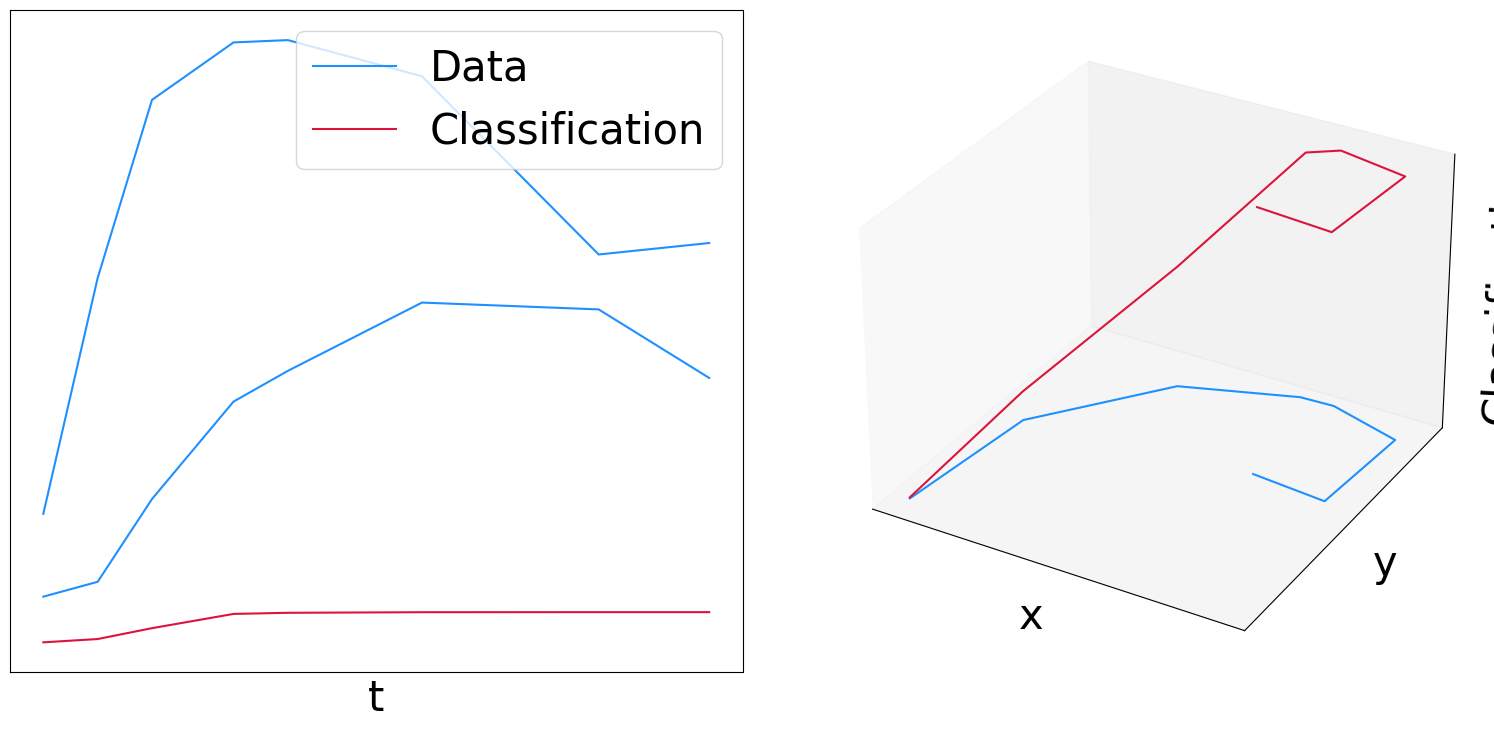

In [215]:
# Training loop like normal.

def categorical_crossentropy(y_true, y_pred, epsilon=1e-15):
    """
    Categorical cross-entropy loss for multi-class classification performance.

    More readings:

    https://gombru.github.io/2018/05/23/cross_entropy_loss/
    """
    # Ensure predictions are clipped to avoid log(0)
    y_pred = jnp.clip(y_pred, epsilon, 1 - epsilon)

    # Calculate the categorical cross-entropy
    loss = -jnp.sum(y_true * jnp.log(y_pred), axis=1)

    # Return the mean loss over all samples
    return jnp.mean(loss)

@eqx.filter_jit
def loss(model, ti, label_i, coeff_i):
    pred = jax.vmap(model)(ti, coeff_i)

    # Multi-class cross-entropy
    cxe = categorical_crossentropy(y_true = label_i, y_pred = pred)

    # Binary cross-entropy
    # bxe = label_i * jnp.log(pred) + (1 - label_i) * jnp.log(1 - pred)

    cxe = -jnp.mean(cxe)
    acc = jnp.mean((pred > 0.5) == (label_i == 1))
    return cxe, acc

grad_loss = eqx.filter_value_and_grad(loss, has_aux=True)

@eqx.filter_jit
def make_step(model, data_i, opt_state):
    ti, label_i, *coeff_i = data_i
    (bxe, acc), grads = grad_loss(model, ti, label_i, coeff_i)
    updates, opt_state = optim.update(grads, opt_state)
    model = eqx.apply_updates(model, updates)
    return bxe, acc, model, opt_state

# optim = optax.adam(lr)
# opt_state = optim.init(eqx.filter(model, eqx.is_inexact_array))
# for step, data_i in zip(
#     range(steps), dataloader((ts_cyan, labels_cyan) + coeffs_cyan, batch_size, key=loader_key)
# ):
#     start = time.time()
#     bxe, acc, model, opt_state = make_step(model, data_i, opt_state)
#     end = time.time()
#     print(
#         f"Step: {step}, Loss: {bxe}, Accuracy: {acc}, Computation time: "
#         f"{end - start}"
#     )

# ts, coeffs, labels, _ = get_data(dataset_size, add_noise, key=test_data_key)
bxe, acc = loss(model = model_cyan,
                ti = ts_cyan,
                label_i = labels_one_hot_cyan,
                coeff_i = coeffs_cyan)
print(f"Test loss: {bxe}, Test Accuracy: {acc}")

# Plot results
sample_ts = ts_cyan[-1]
sample_coeffs = tuple(c[-1] for c in coeffs_cyan)
pred = model_cyan(sample_ts, sample_coeffs, evolving_out=True)
interp = diffrax.CubicInterpolation(sample_ts, sample_coeffs)
values = jax.vmap(interp.evaluate)(sample_ts)
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax1.plot(sample_ts, values[:, 1], c="dodgerblue")
ax1.plot(sample_ts, values[:, 2], c="dodgerblue", label="Data")
ax1.plot(sample_ts, pred, c="crimson", label="Classification")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("t")
ax1.legend()
ax2.plot(values[:, 1], values[:, 2], c="dodgerblue", label="Data")
ax2.plot(values[:, 1], values[:, 2], pred, c="crimson", label="Classification")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("Classification")
plt.tight_layout()
plt.savefig("neural_cde.png")
plt.show()